In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
from itertools import cycle, islice
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pandas.plotting import autocorrelation_plot



In [3]:
#read in data
state_data = pd.read_csv("4.18states.csv")
counties = pd.read_csv("abridged_counties.csv")
confirmed_cases_ts = pd.read_csv("time_series_covid19_confirmed_US.csv")
deaths_ts = pd.read_csv("time_series_covid19_deaths_US.csv")

In [4]:
#selecting columns of interest
counties_mod = counties[["CountyName","#FTEHospitalTotal2017","TotalM.D.'s,TotNon-FedandFed2017","#Hospitals", "#ICU_beds","countyFIPS"]]
counties_mod=counties_mod.rename(columns={"countyFIPS": "FIPS"})
counties_mod = counties_mod.set_index("FIPS")


In [5]:
#FIPS = way of identifying each county
deaths_ts_mod = deaths_ts.set_index("FIPS")

#select date columns which show the number of
#deaths per day
deaths_ts_mod=deaths_ts_mod.iloc[:,12:]

#sum number of deaths for each county
deaths_ts_mod['Deaths']= deaths_ts_mod.iloc[:,12:].sum(axis=1)

deaths_ts_mod = deaths_ts_mod[["Deaths"]]

#merge deaths_ts and counties_mod
deaths_and_counties = pd.merge(counties_mod,deaths_ts_mod,how = "inner", on = "FIPS")


deaths_and_counties = deaths_and_counties.drop(["CountyName"],axis = 1)

In [6]:
#normalize data (all columns except the "Deaths" column)
x2 = deaths_and_counties.values 
min_max_scaler = preprocessing.MinMaxScaler()
x2_scaled = min_max_scaler.fit_transform(x2)
normalized_table= pd.DataFrame(x2_scaled,columns=deaths_and_counties.columns)
normalized_table = normalized_table.assign(Deaths=deaths_and_counties['Deaths'].values)

In [7]:
features = normalized_table

# train_labels, test_labels
train_features, test_features= train_test_split(features,test_size = 0.25,
random_state = 42)

#create and fit models
logistic_model = LogisticRegression().fit(train_features[['#FTEHospitalTotal2017',
"TotalM.D.'s,TotNon-FedandFed2017","#Hospitals"]], train_features['Deaths'])

logistic_test_model = LogisticRegression().fit(test_features[['#FTEHospitalTotal2017',
"TotalM.D.'s,TotNon-FedandFed2017","#Hospitals"]], test_features['Deaths'])


In [8]:
#get model accuracy
lm_train_accuracy=logistic_model.score(train_features[["TotalM.D.'s,TotNon-FedandFed2017",'#FTEHospitalTotal2017',
"#Hospitals"]],train_features['Deaths'])

lm_test_accuracy=logistic_test_model.score(test_features[['#FTEHospitalTotal2017',
"TotalM.D.'s,TotNon-FedandFed2017","#Hospitals"]],test_features['Deaths'])


lm_train_accuracy,lm_test_accuracy

(0.6101910828025477, 0.640764331210191)

In [9]:
X = train_features[["TotalM.D.'s,TotNon-FedandFed2017",'#FTEHospitalTotal2017',
"#Hospitals"]]
y=train_features['Deaths']
cross_val_score(logistic_model, X, y, cv=5)

/srv/conda/envs/data100/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


array([0.60934183, 0.61146497, 0.60934183, 0.60934183, 0.60934183])

Text(0.5, 1.0, 'Deaths Frequency Per County')

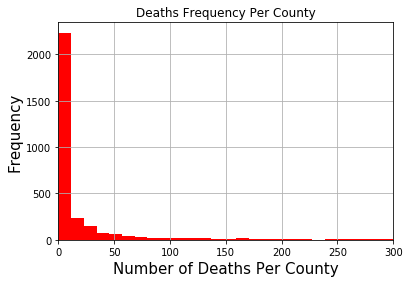

In [10]:
#Histogram Visualization
df = features
hist=df.hist(column = "Deaths",bins=10000,color = 'r')
plt.xlim([0.0,300.0])
plt.xlabel("Number of Deaths Per County",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.title("Deaths Frequency Per County")

Text(0.5, 1.0, '#Hospitals vs Deaths Per County')

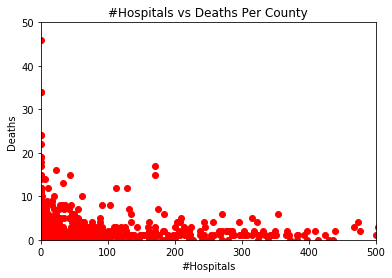

In [11]:
#Scatterplot
deaths_ts_graphs_mod = deaths_ts_mod.tail(-24)
df = pd.DataFrame(np.random.randn(10,3231), columns=[deaths_ts_graphs_mod['Deaths'],counties["#Hospitals"]])
plt.scatter(deaths_ts_graphs_mod['Deaths'], counties["#Hospitals"],c='r')
plt.xlim([0.0,500.0])
plt.ylim([0.0,50.0])
plt.xlabel("#Hospitals")
plt.ylabel("Deaths")
plt.title("#Hospitals vs Deaths Per County")

Text(0.5, 1.0, '#FTEHospitalTotal2017 vs Deaths')

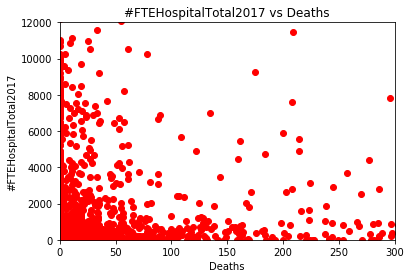

In [12]:
#Scatterplot
deaths_ts_graphs_mod = deaths_ts_mod.tail(-24)
df = pd.DataFrame(np.random.randn(10,3231), columns=[deaths_ts_graphs_mod['Deaths'],counties["#FTEHospitalTotal2017"]])
plt.scatter(deaths_ts_graphs_mod['Deaths'], counties["#FTEHospitalTotal2017"],c='r')
plt.xlim([0.0,300.0])
plt.ylim([0.0,12000.0])
plt.xlabel("Deaths")
plt.ylabel("#FTEHospitalTotal2017")
plt.title("#FTEHospitalTotal2017 vs Deaths")